# B-Field Variation - Worked Example
Does the magnetic field around your workspace have the same magnitude as outside? Perform an investigation to answer that and replace the ***pseudocode*** below with your own analysis of data you collect.

Analysis based on [Natasha Holmes' t'](https://docs.google.com/document/d/1cjAfYwbG4IrwirHMPnvo87ZYdPTXBAWQAny4b1eVclE/edit?usp=sharing).

In [1]:
# import modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data files
inside = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/inside.csv')
inside.head()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
0,0.029331,-23.271011,-15.906281,-36.793800,46.350118
1,0.039346,-23.251556,-15.899689,-36.877266,46.404393
2,0.049361,-23.248703,-15.971283,-36.842331,46.399800
3,0.059376,-23.295670,-15.989258,-36.922569,46.493233
4,0.069390,-23.246887,-15.974823,-36.995743,46.522013


In [3]:
inside.shape

(269, 5)

In [4]:
# read in data files
outside = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/outside.csv')
outside.shape

(426, 5)

In [5]:
inside.describe()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
count,269.000000,269.000000,269.000000,269.000000,269.000000
mean,1.371330,-23.174834,-15.665396,-36.663973,46.116815
std,0.779139,0.099672,0.176038,0.150317,0.165120
min,0.029331,-23.504959,-16.062042,-37.047340,45.714708
25%,0.700330,-23.238632,-15.768539,-36.767296,45.996087
50%,1.371329,-23.174301,-15.646362,-36.668472,46.120598
75%,2.042329,-23.106583,-15.542023,-36.566025,46.226865
max,2.713329,-22.884781,-15.251251,-36.259079,46.554957


In [6]:
outside.describe()

,Time (s),Magnetic Field x (µT),Magnetic Field y (µT),Magnetic Field z (µT),Absolute field (µT)
count,426.000000,426.000000,426.000000,426.000000,426.000000
mean,2.146227,-23.516595,-9.382197,-36.832433,44.697213
std,1.233057,0.164929,0.342086,0.185716,0.146441
min,0.018019,-24.004211,-10.088837,-37.343826,44.277130
25%,1.082124,-23.621788,-9.711029,-36.964819,44.602293
50%,2.146227,-23.500366,-9.320625,-36.852119,44.708492
75%,3.210331,-23.395000,-9.075703,-36.712832,44.798842
max,4.274435,-23.143875,-8.768082,-36.310555,45.074549


In [7]:
# caluclate a Holmes t' to compare the two samples
inside_mean = inside['Absolute field (µT)'].mean()
outside_mean = outside['Absolute field (µT)'].mean()
inside_unc = inside['Absolute field (µT)'].std() / np.sqrt(inside['Absolute field (µT)'].count())
outside_unc = outside['Absolute field (µT)'].std() / np.sqrt(outside['Absolute field (µT)'].count())
combined_unc = np.sqrt(inside_unc**2 + outside_unc**2)

t_prime = np.abs(inside_mean - outside_mean) / combined_unc
t_prime

115.26024036396795

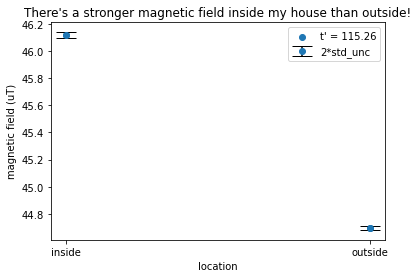

In [8]:
# the values that get plotted
x_values = ["inside", "outside"]
y_values = [inside_mean, outside_mean]
errorbars = [2*inside_unc, 2*outside_unc]   # state what your errorbars represent; 2x unc. is common

# make the plot
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, label="t' = " + str(np.round(t_prime,2)))
ax.errorbar(x_values, y_values, yerr=errorbars, ecolor='black', capsize=10, fmt='o', label="2*std_unc")
ax.set_title("There's a stronger magnetic field inside my house than outside!")
ax.set_xlabel("location")
ax.set_ylabel("magnetic field (uT)")
ax.legend()
plt.show()

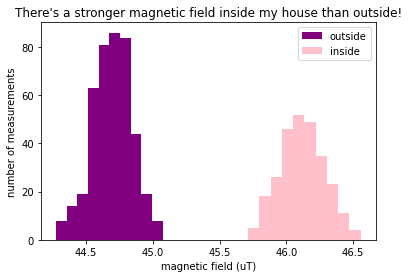

In [9]:
# make a histogram
fig, ax = plt.subplots()
ax.hist(outside['Absolute field (µT)'], color='purple', label="outside")
ax.hist(inside['Absolute field (µT)'], color='pink', label="inside")
ax.set_title("There's a stronger magnetic field inside my house than outside!")
ax.set_xlabel("magnetic field (uT)")
ax.set_ylabel("number of measurements")
ax.legend()
plt.show()

In [10]:
# answer the research question in claim-evidence-reasoning style

The magnitude of the ambient magnetic field inside my house (mean = 46.1 uT, n = 269) appears to be larger than the field outside (mean = 44.7 uT, n = 426). Since the t' value is much larger than 3 (t' = 115.3), this strongly suggests this difference is more than can be attributed to the uncertainities in the measurements.